# I. Define Problem 

To build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes, based on certain diagnostic measurements.  

# II. Dataset 

### Dataset Description

The dataset used in this project was downloaded from Kaggle and is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. For this particular dataset, all patients here are females at least 21 years old of Pima Indian heritage.

Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Exploratory Data Analysis

The dataset consists of several medical predictor (independent) variables and one target (dependent) variable, i.e., "Outcome". Independent variables include: the number of pregnancies the patient has had, glugose level , blood pressure, skin thickness, insulin level, insulin level, diabetes pedigree function, and age. In total, there are 764 rows and 9 columns.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diabetes - training_validation.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               764 non-null    int64  
 1   Glucose                   764 non-null    int64  
 2   BloodPressure             764 non-null    int64  
 3   SkinThickness             764 non-null    int64  
 4   Insulin                   764 non-null    int64  
 5   BMI                       764 non-null    float64
 6   DiabetesPedigreeFunction  764 non-null    float64
 7   Age                       764 non-null    int64  
 8   Outcome                   764 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.8 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.853403,120.863874,69.077225,20.609948,80.196335,31.979843,0.472385,33.197644,0.348168
std,3.372384,31.931690,19.382690,15.940657,115.413500,7.898644,0.331711,11.701461,0.476702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,128.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Based on observations, this dataset is pretty clean with no any missing data. Let's explore a bit further to see whether there are any significant outliers in the dataset.

In [6]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000096E8B48>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

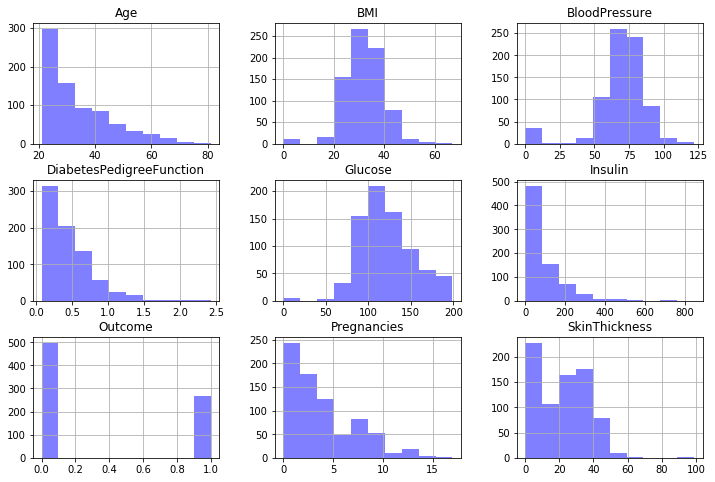

In [7]:
plt.figure()
df.hist(color='b',alpha=0.5, figsize=(12,8))

Based on observations, I would like to say that there are no significant outliers in this dataset. However, some of the parameters seems quite skewed, including Age, DiabetesPrdigreeFunction, Insulin, and Pregnancies. 

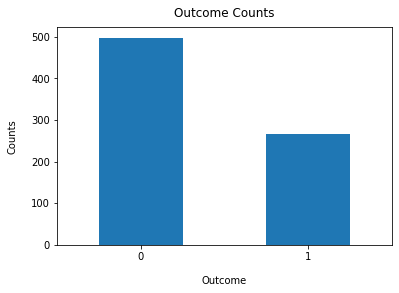

In [8]:
plt.figure()
df.Outcome.value_counts().plot(kind='bar',figsize=(6,4), rot=0)

plt.xlabel("Outcome", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Outcome Counts", y=1.02);

The distrubution of our target, i.e., dependant, seems not be perfectly balanced. We may need to resample the training data to solve this binary classification problem. 

# III. Build Azure Machine Learning Model 

### Create Azure Machine Learning  

Create compute resource

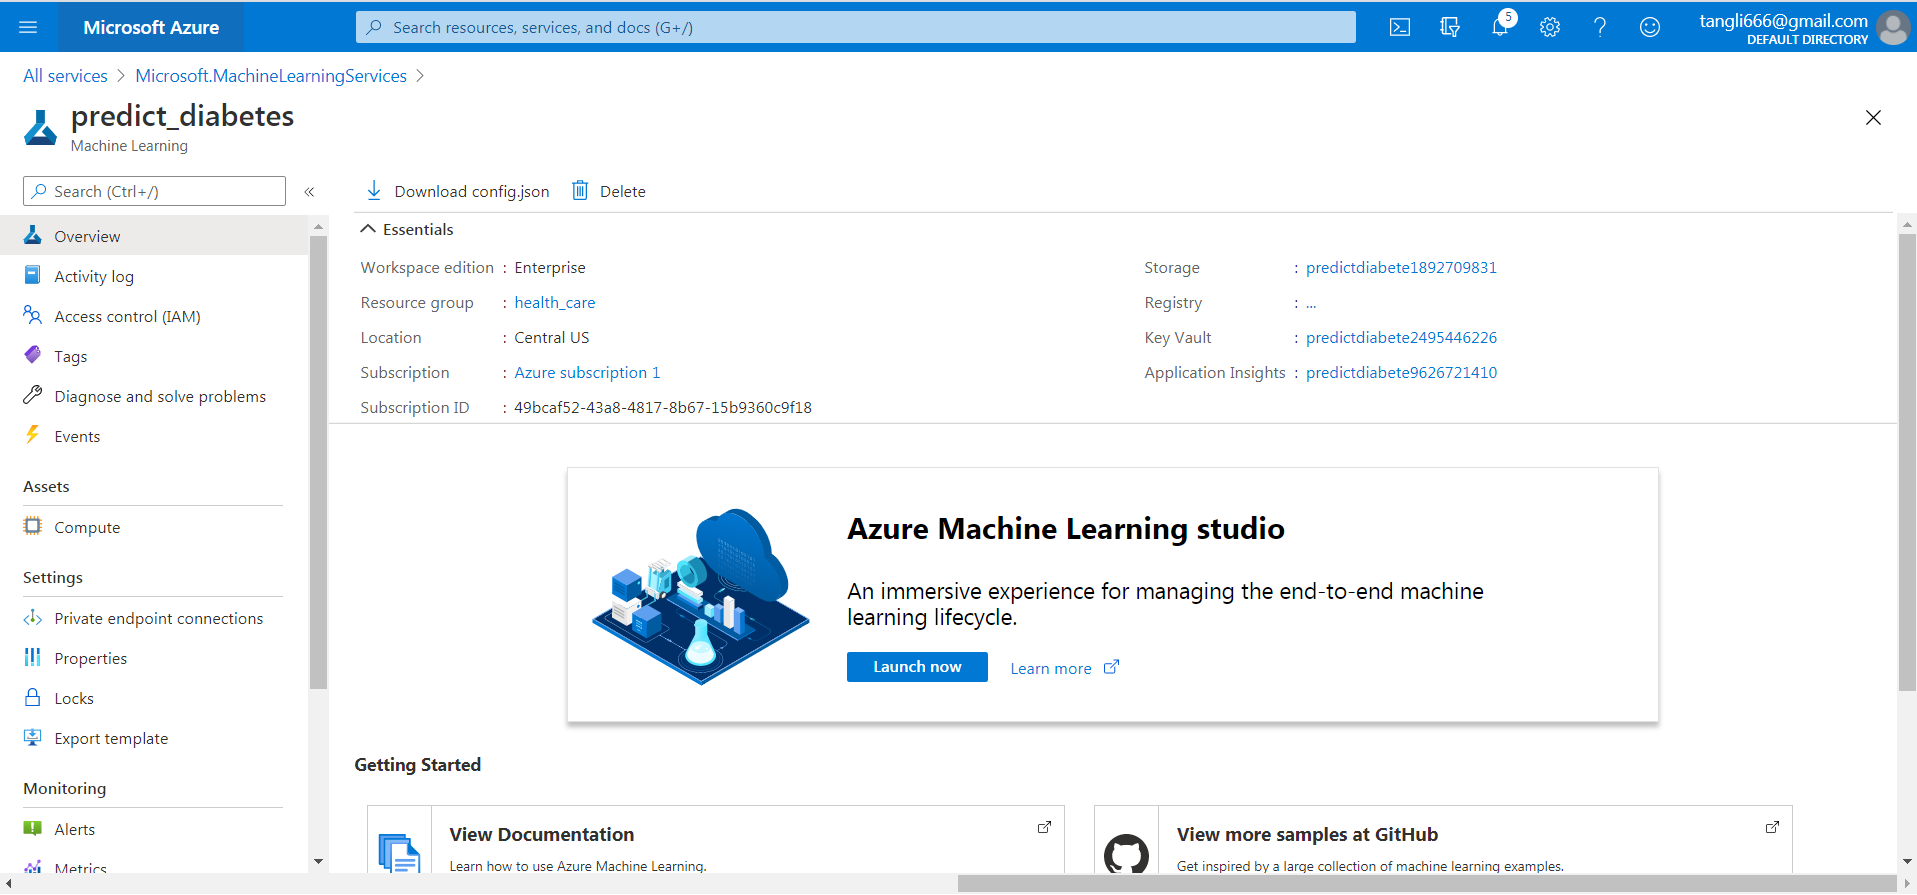

Launch Azure Machine learning studio 

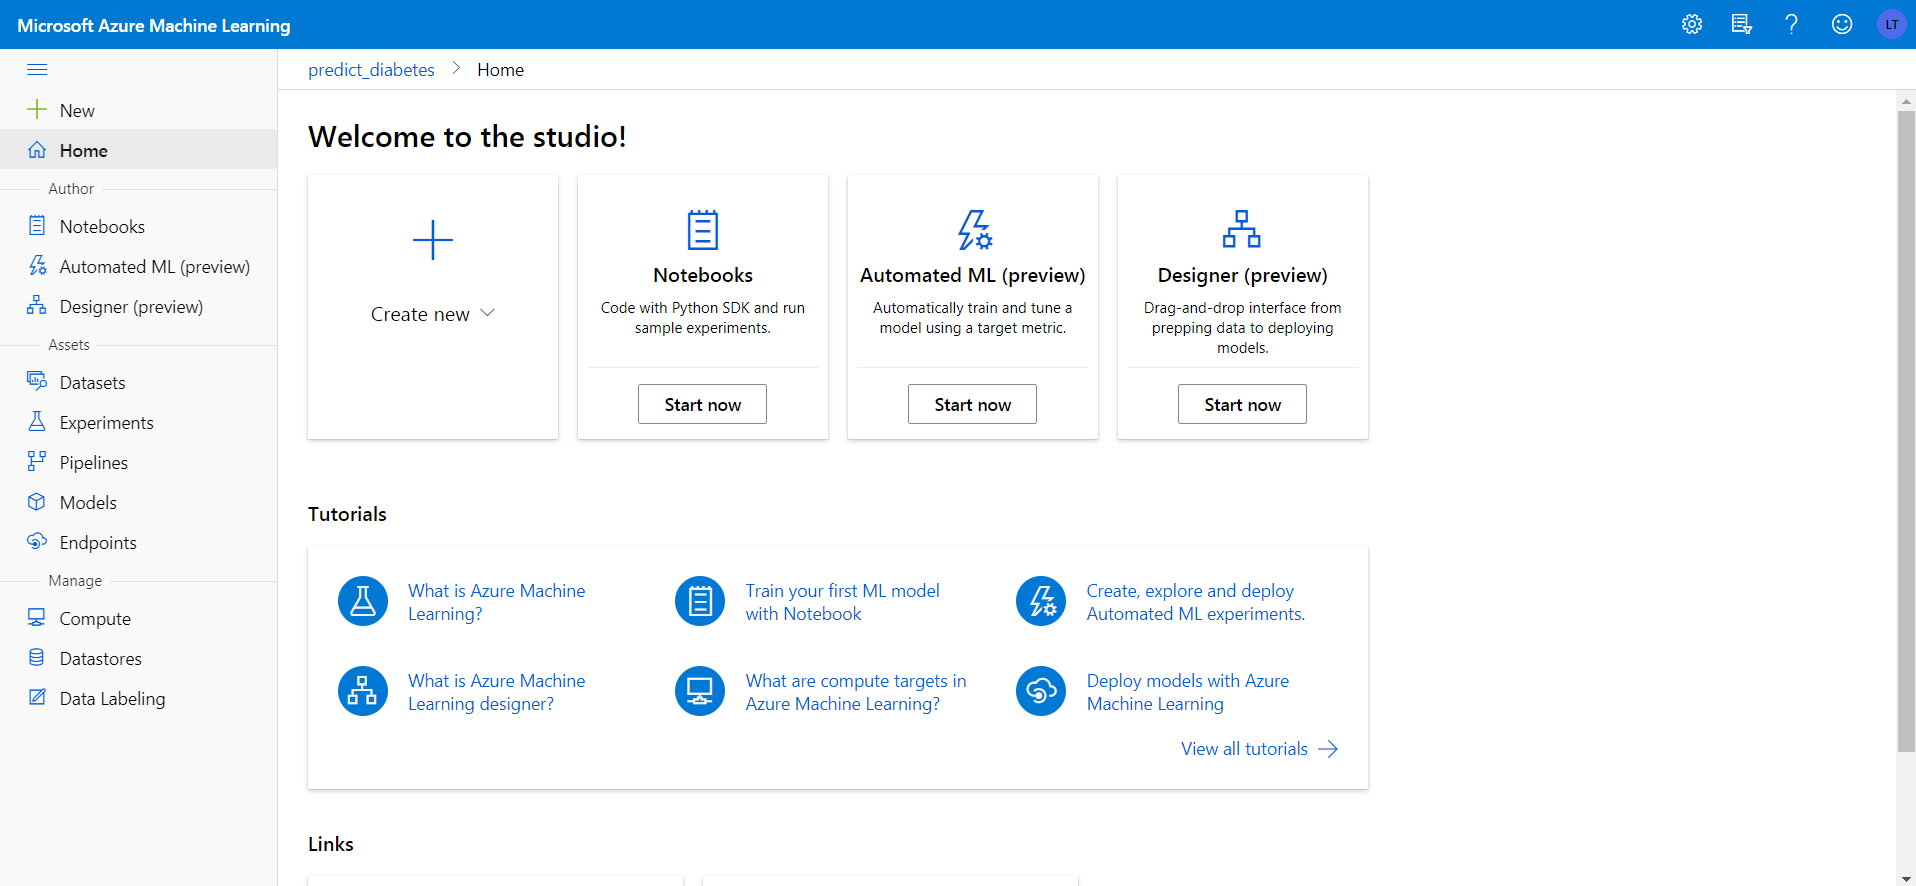

### Training Data Imported as Azure Dataset 

Import raw data as dataset

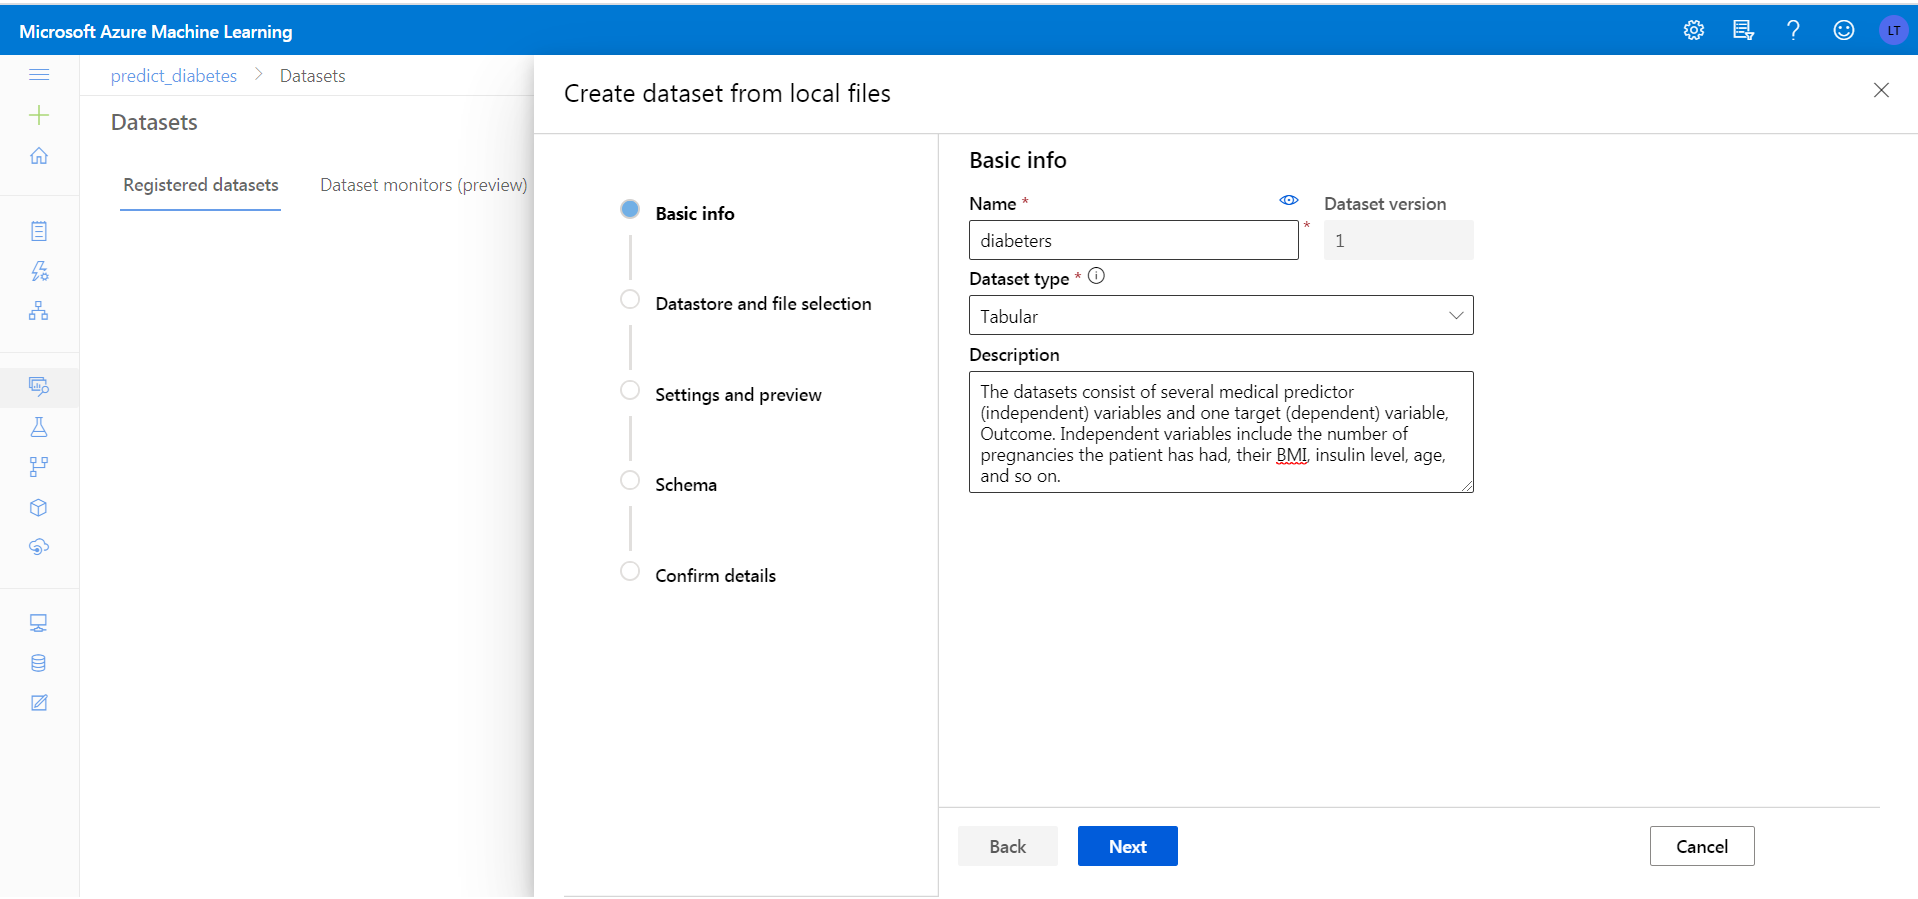

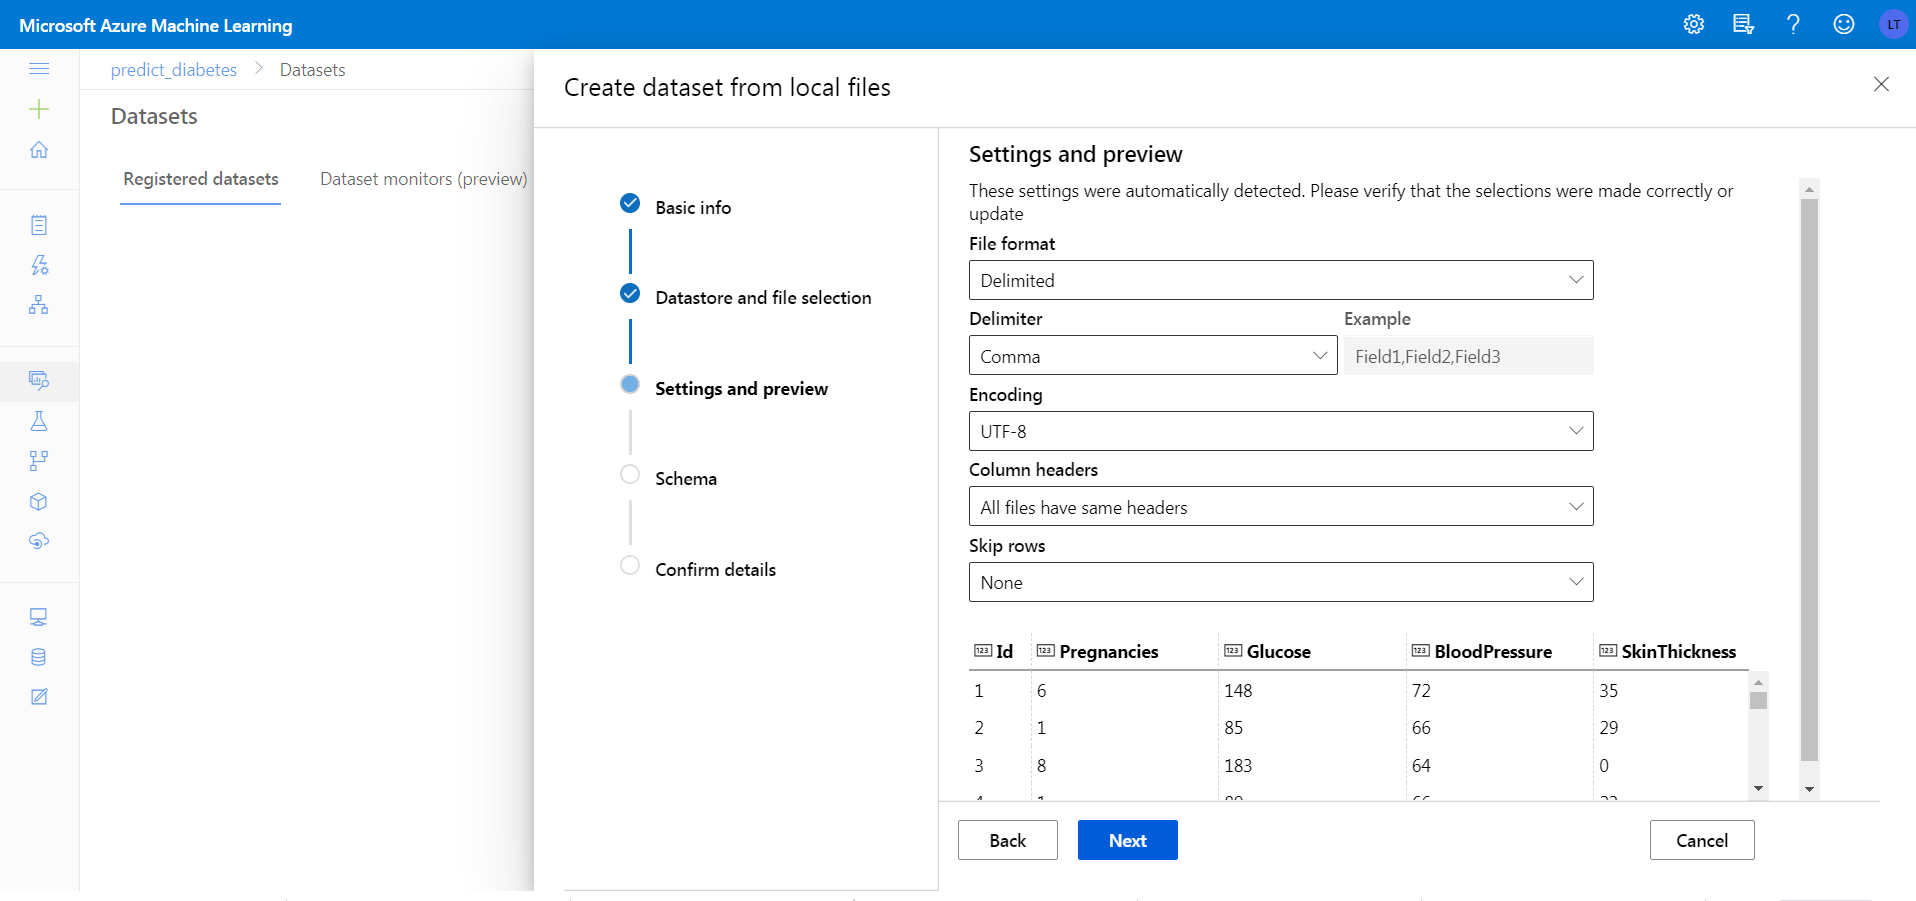

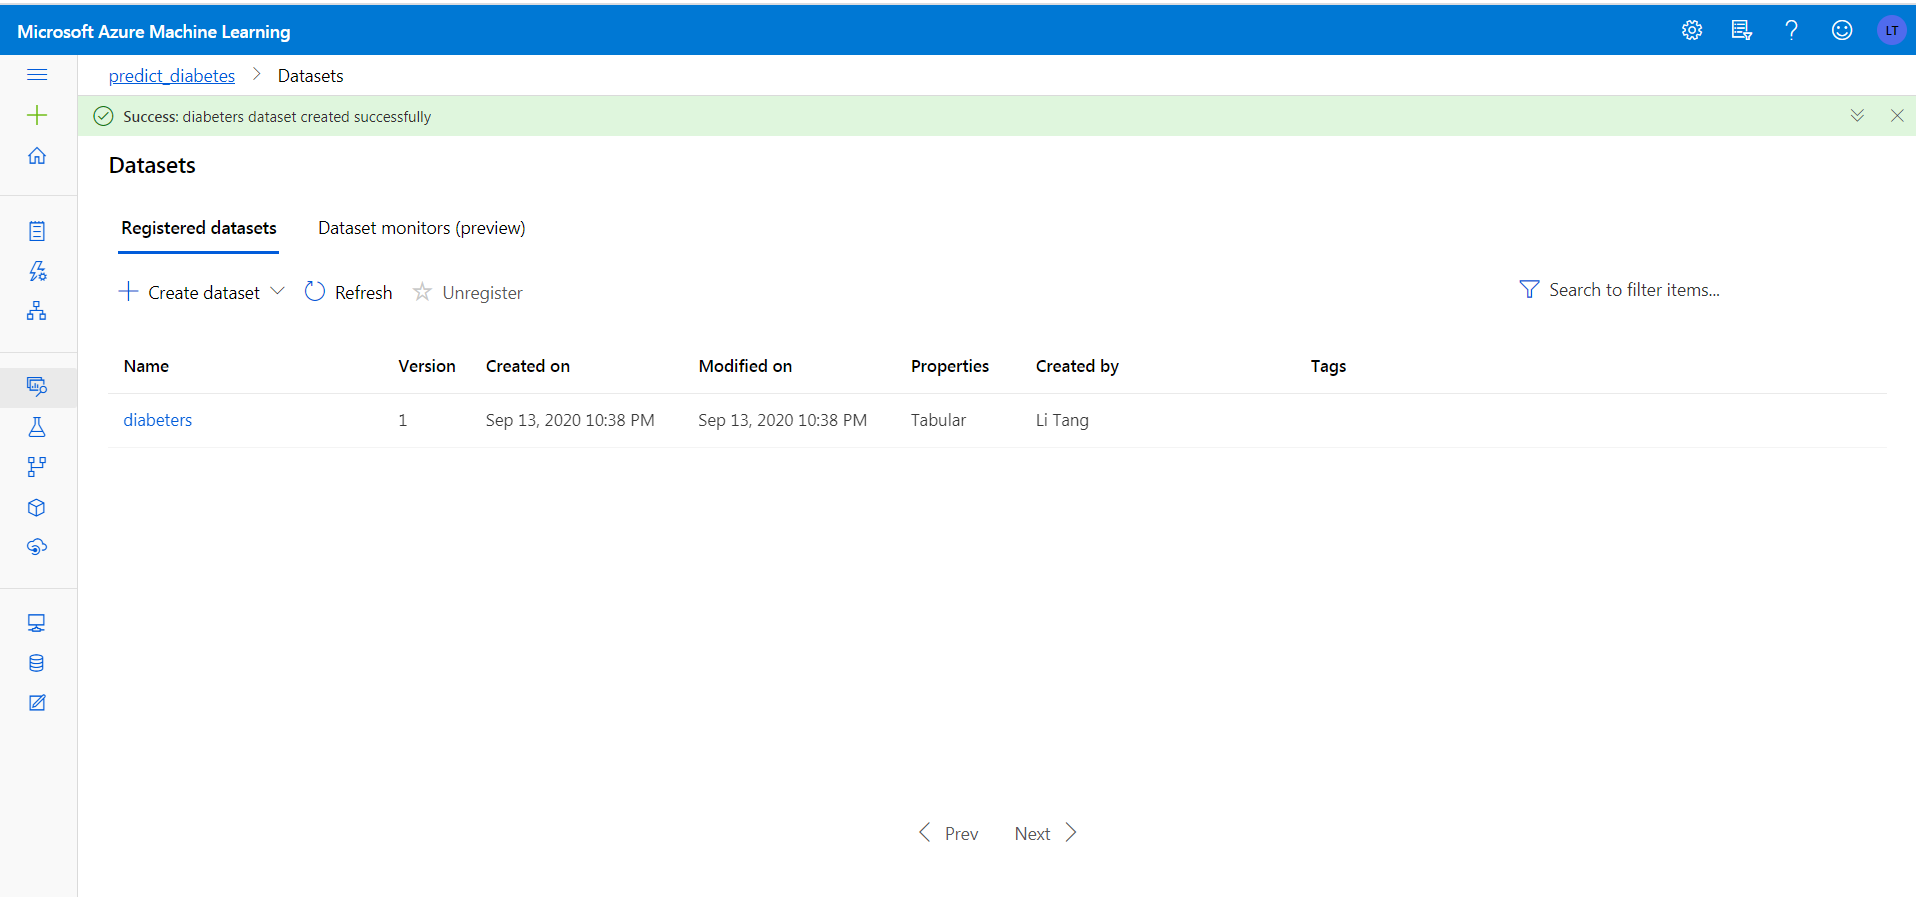

### Machine Learning Model Setup with Designer 

Use "Binary Classification - Customer relationship Prediction" as the template

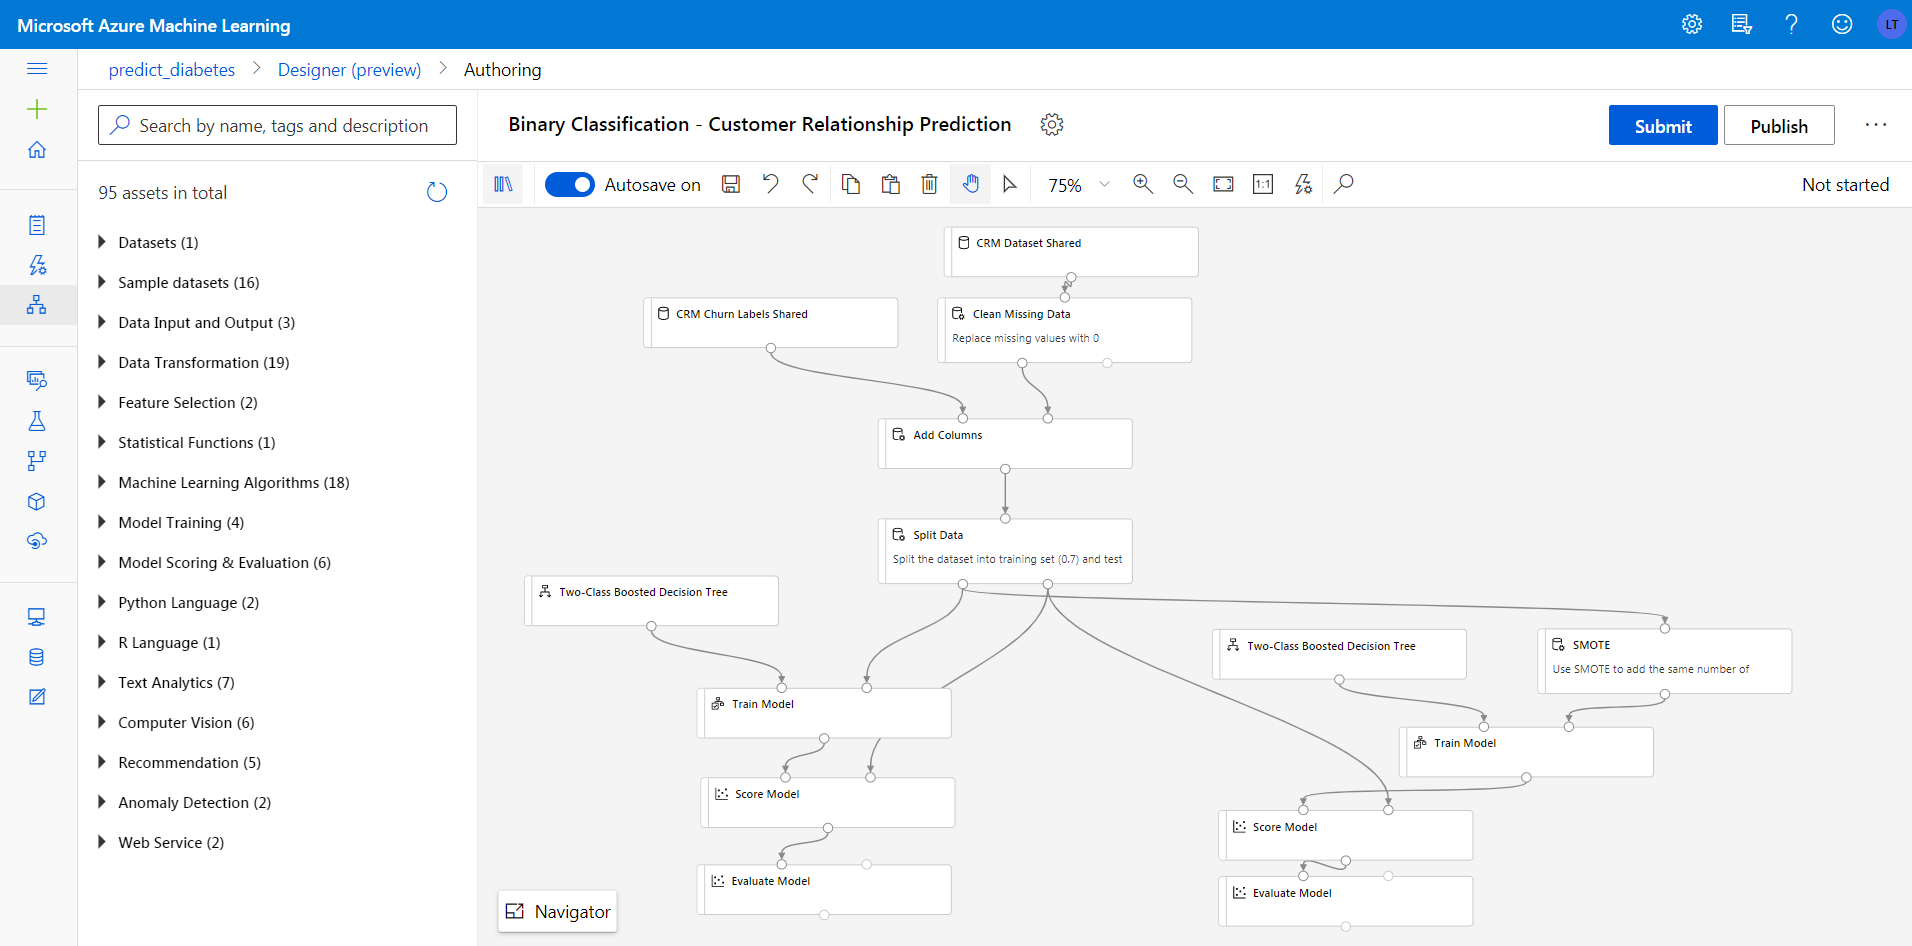

Create a computer target for training

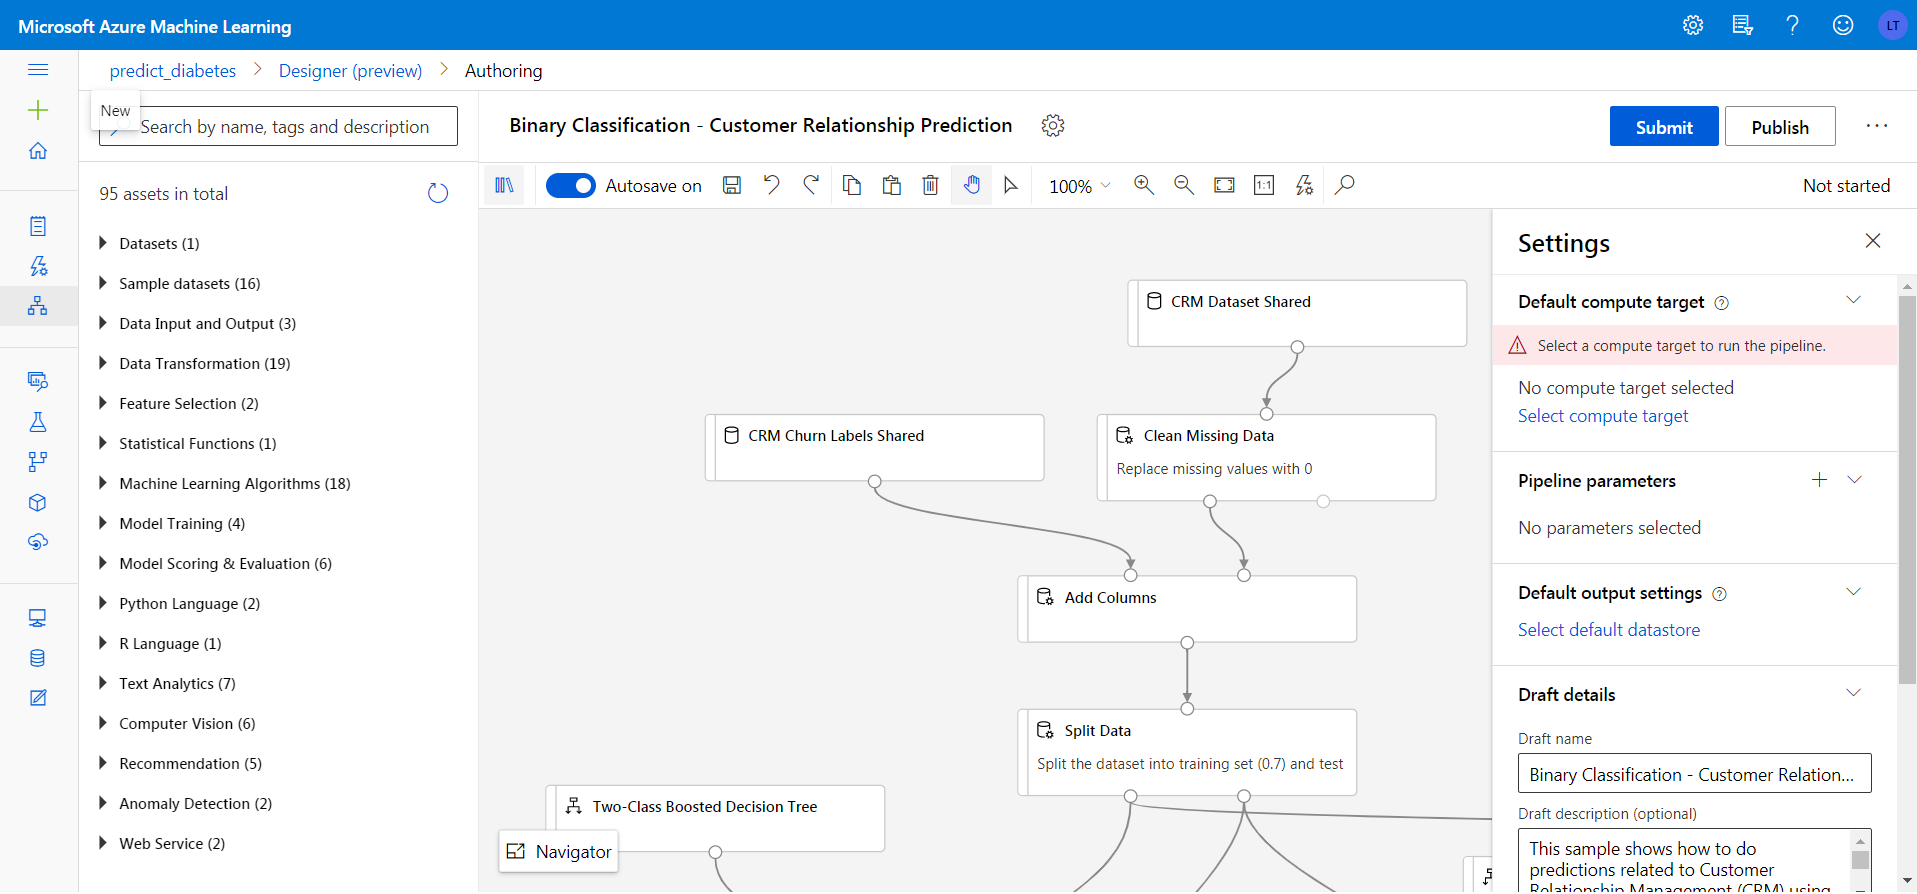

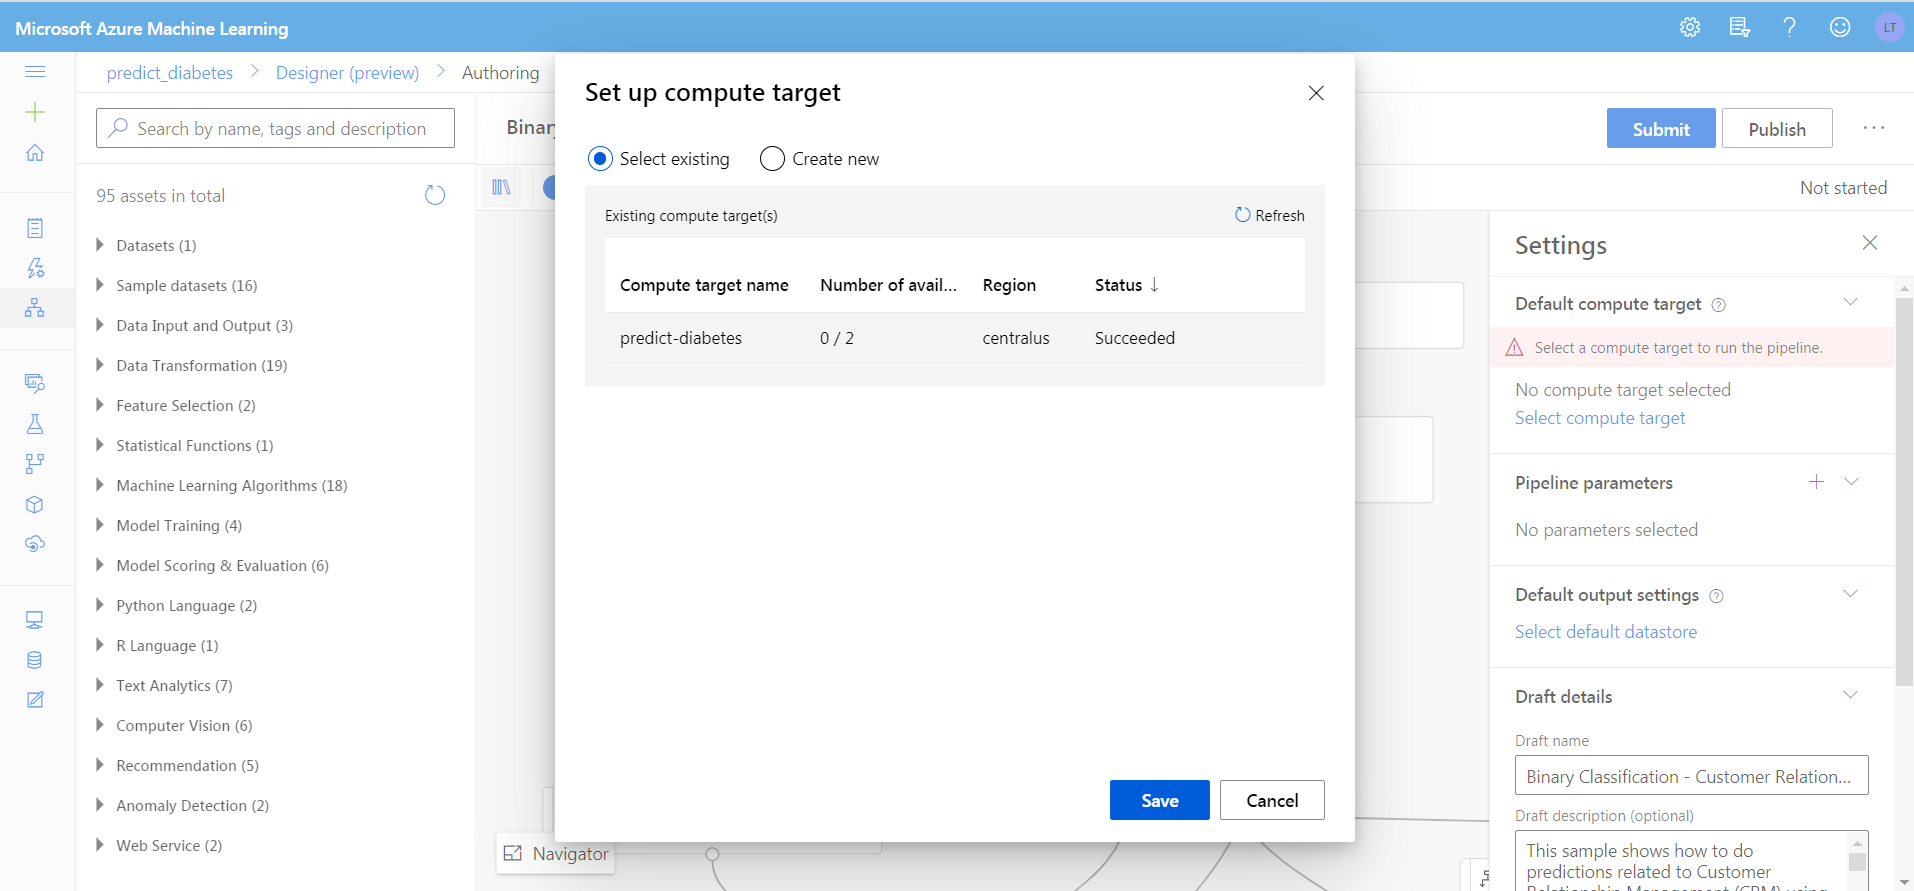

The designer template was modified to better cater to this study, by substituting dataset with "diabetes_" and by deleting "CRM Churn Labels Shared", "Clean Missing Data", and "Add Columns".

In addition, the data category of target "Outcome" was converted from "Numerical" to "Categorical" for "Binary Classification" purpose. "Edit Metadata" was added to fulfill this purpose.  

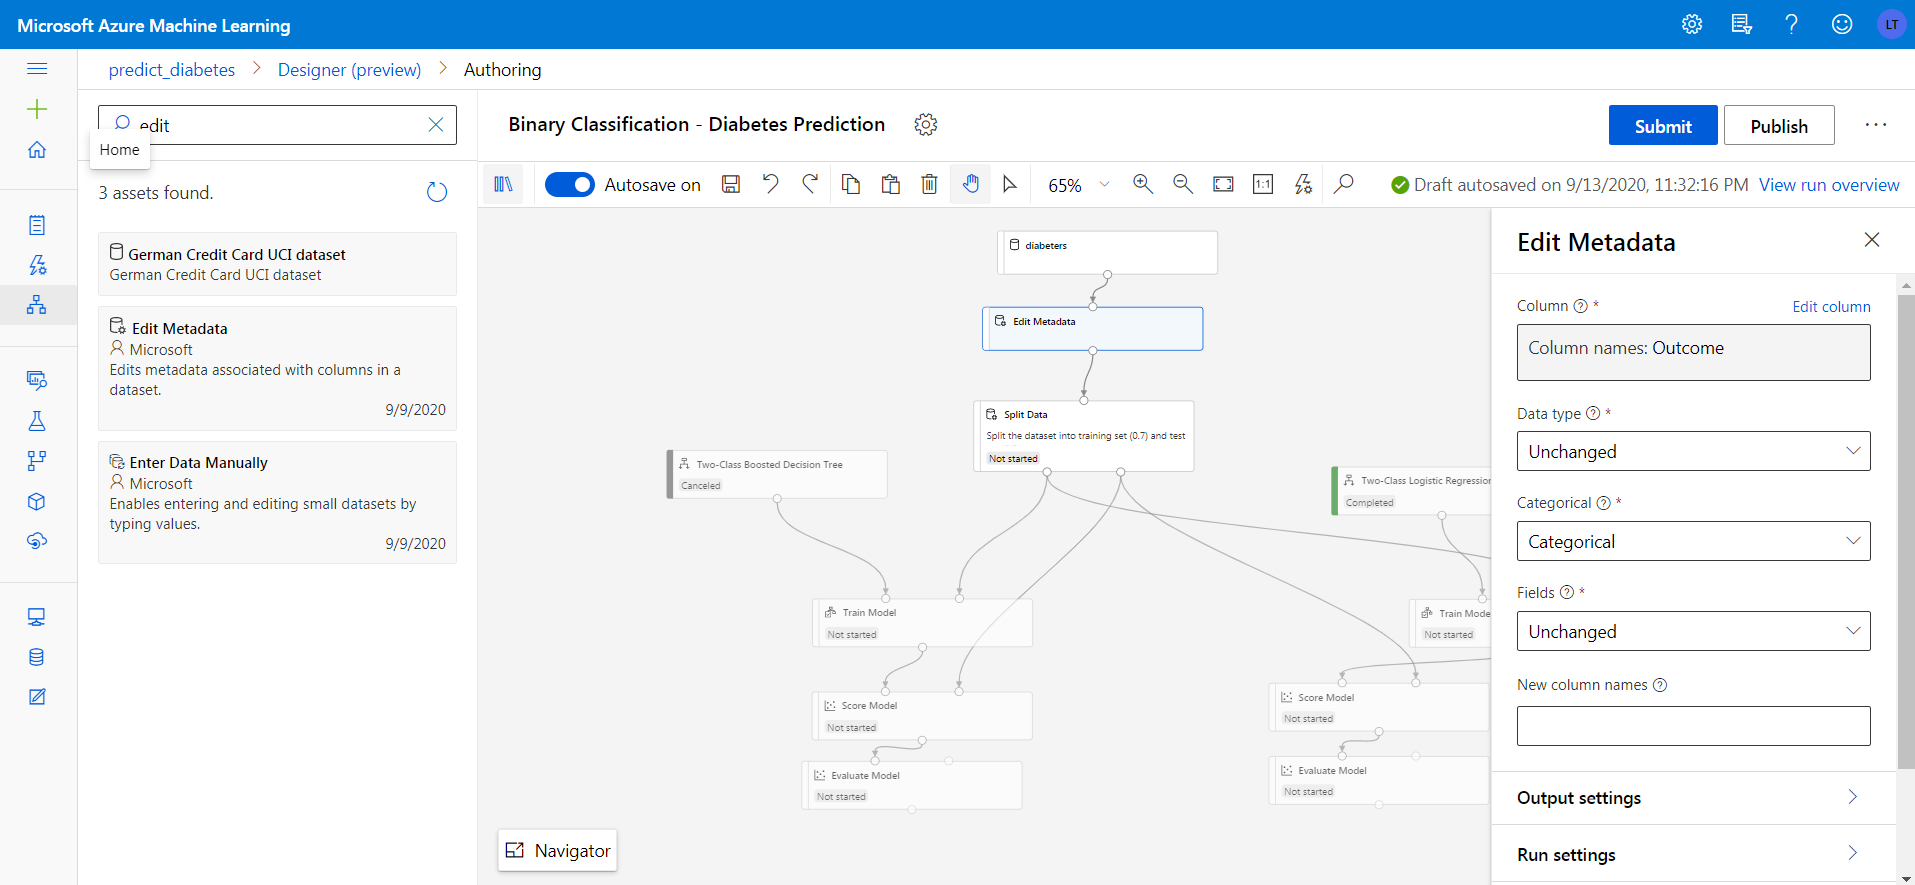

Note: for this study, all the "random seed" was set to "42" to ensure the replication 

Choose "Outcome" as Label Column in "Training Model"

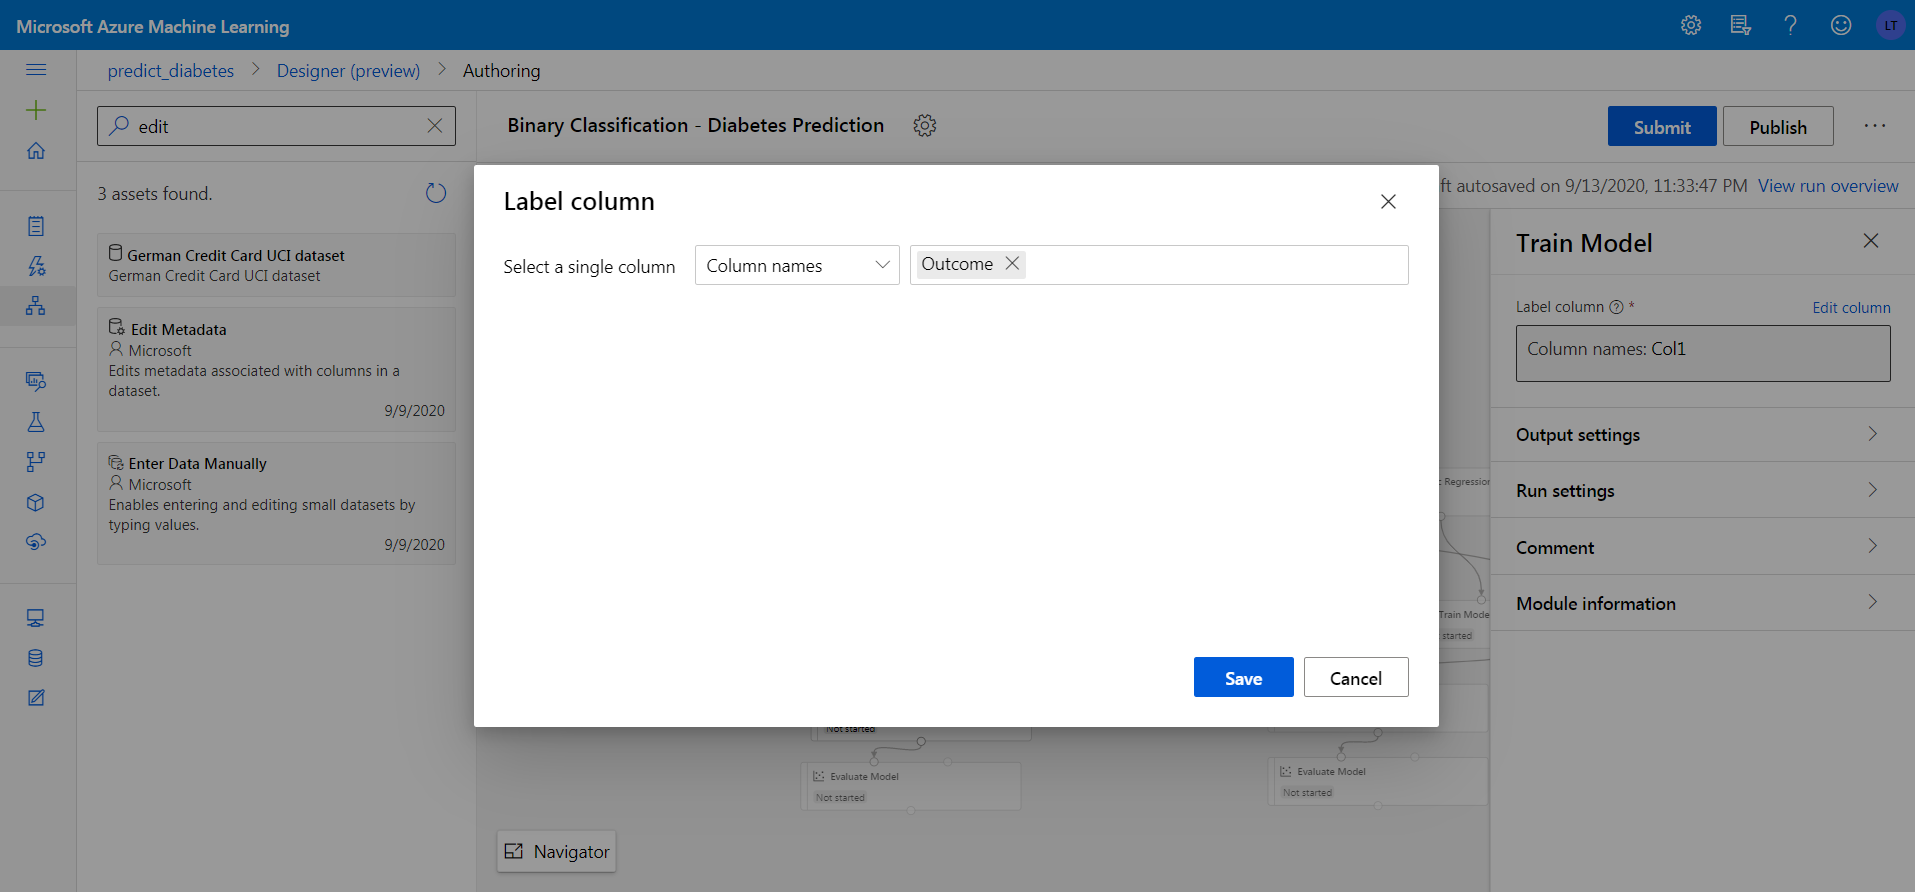

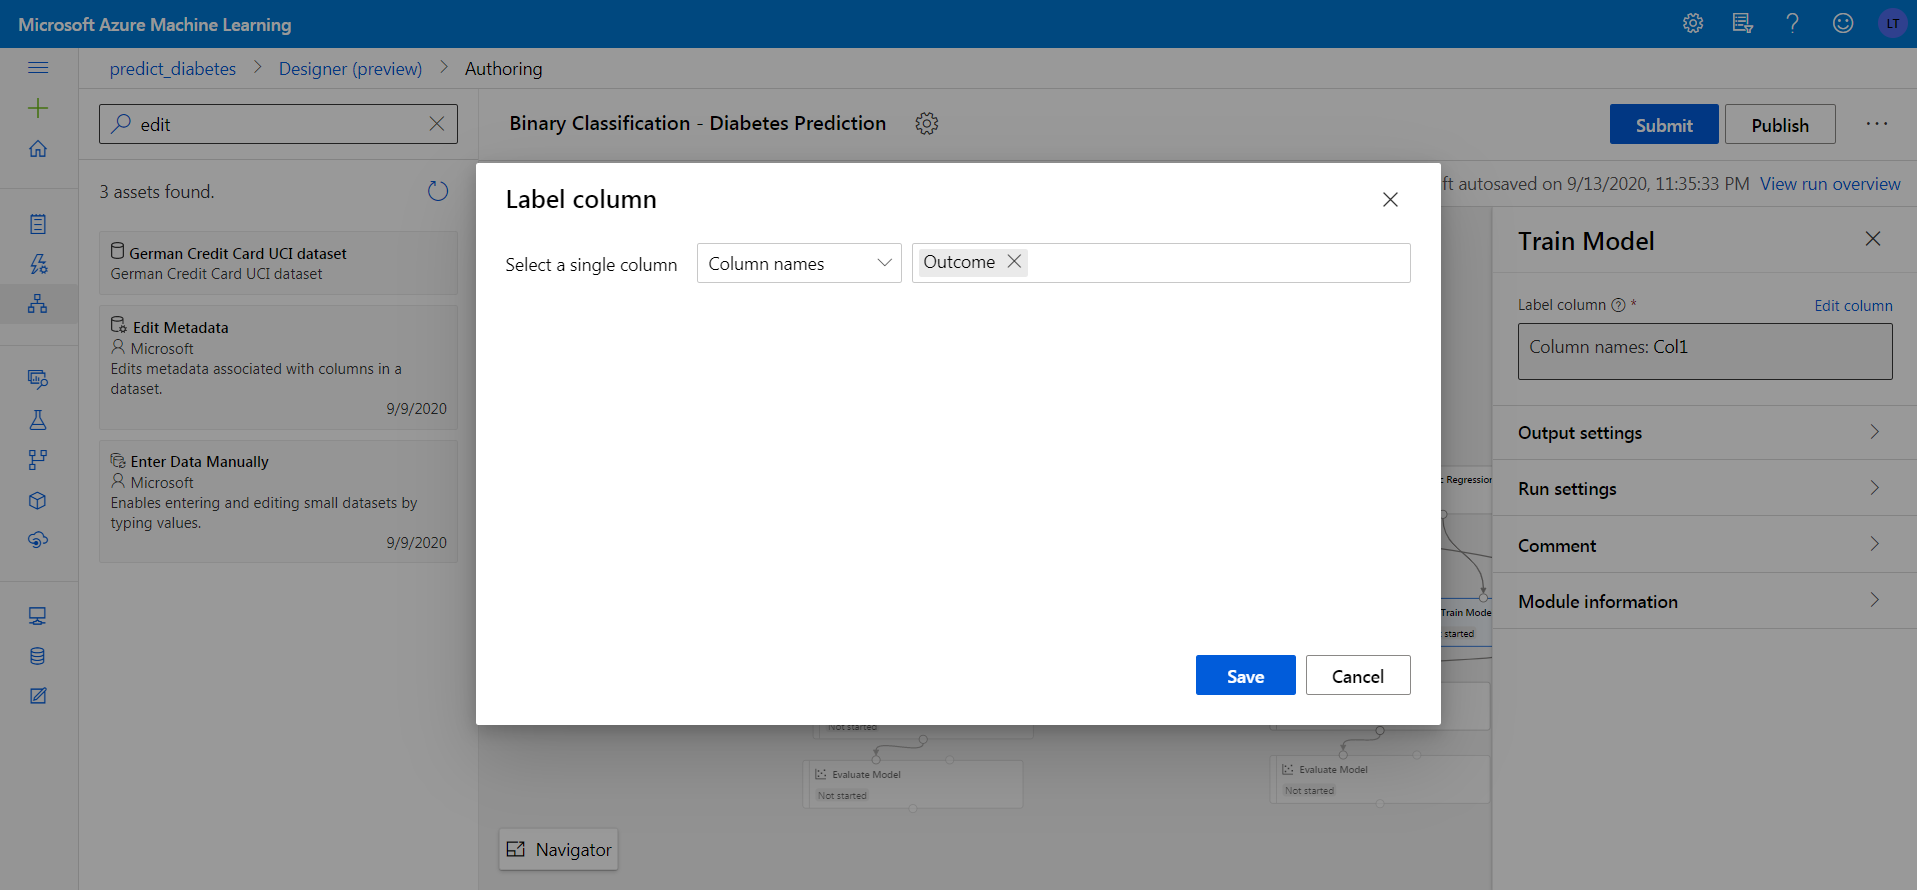

"SMOTE" was used here to increases the number of low incidence examples in a dataset, as this dataset is a bit unbalanced

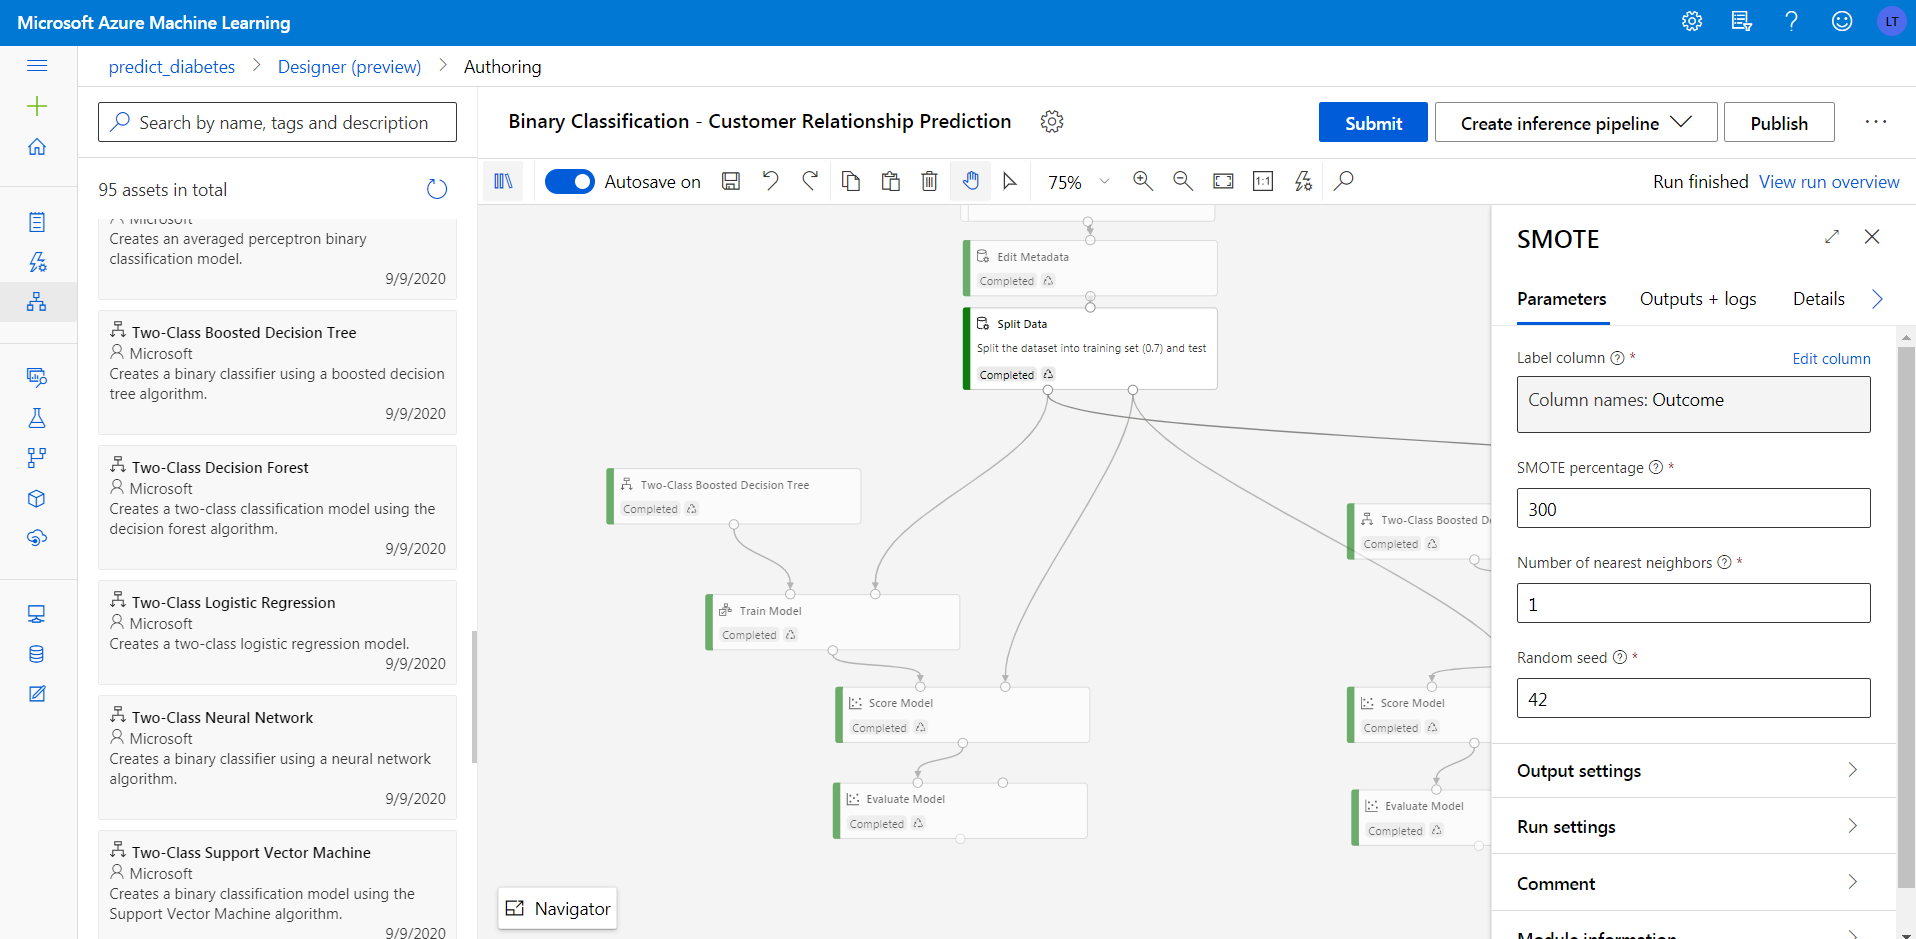

The training models explored here for comparisions are: Two-class Boosted Decision Tree, Two-class Boosted Decision Tree with SMOTE, Two-class Decision Forest, Two-class Logistic Regression, Two-class Neural Network, and Two-class Support Vector Machine 

# IV. Training & Evaluation

Training

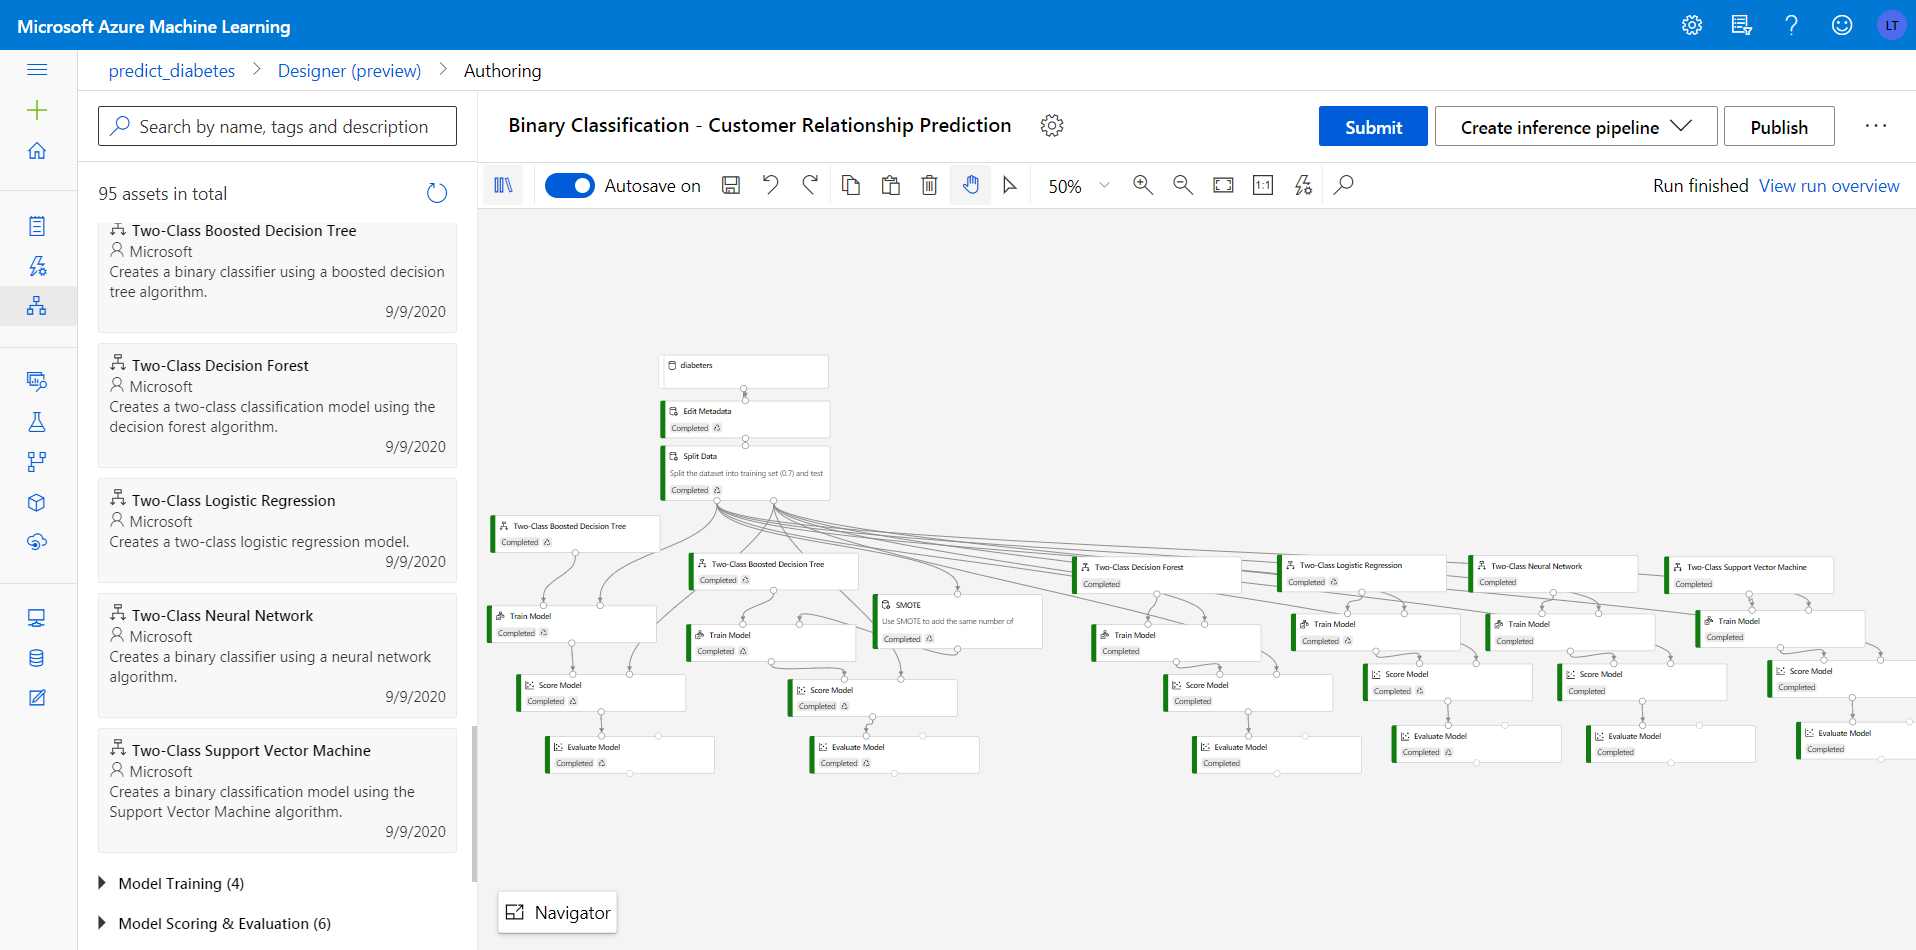

Evaluation

In [10]:
training_results = {"model_name": ["Two-class Boosted Decision Tree","Two-class Boosted Decision Tree with SMOTE", "Two-class Decision Forest","Two-class Logistic Regression","Two-class Neural Network","Two-class Support Vector Machine"], 
           "accuracy": [0.751, 0.751, 0.755, 0.755, 0.712, 0.69], 
           "precision": [0.697, 0.644, 0.675, 0.8, 0.87, 0.75], 
           "recall": [0.554, 0.699, 0.627, 0.434, 0.241, 0.217],
           "F1 score": [0.617, 0.671, 0.65, 0.563, 0.377, 0.336], 
           "AUC": [0.8, 0.799, 0.778, 0.846, 0.823, 0.79] }

training_results_df = pd.DataFrame.from_dict(training_results)
training_results_df

,model_name,accuracy,precision,recall,F1 score,AUC
0,Two-class Boosted Decision Tree,0.751,0.697,0.554,0.617,0.800
1,Two-class Boosted Decision Tree with SMOTE,0.751,0.644,0.699,0.671,0.799
2,Two-class Decision Forest,0.755,0.675,0.627,0.650,0.778
3,Two-class Logistic Regression,0.755,0.800,0.434,0.563,0.846
4,Two-class Neural Network,0.712,0.870,0.241,0.377,0.823
5,Two-class Support Vector Machine,0.690,0.750,0.217,0.336,0.790


Based on evaluations, "Two-class Logistic Regression" will be used for the prediction. 

"Two-class Logistic Regression" model:

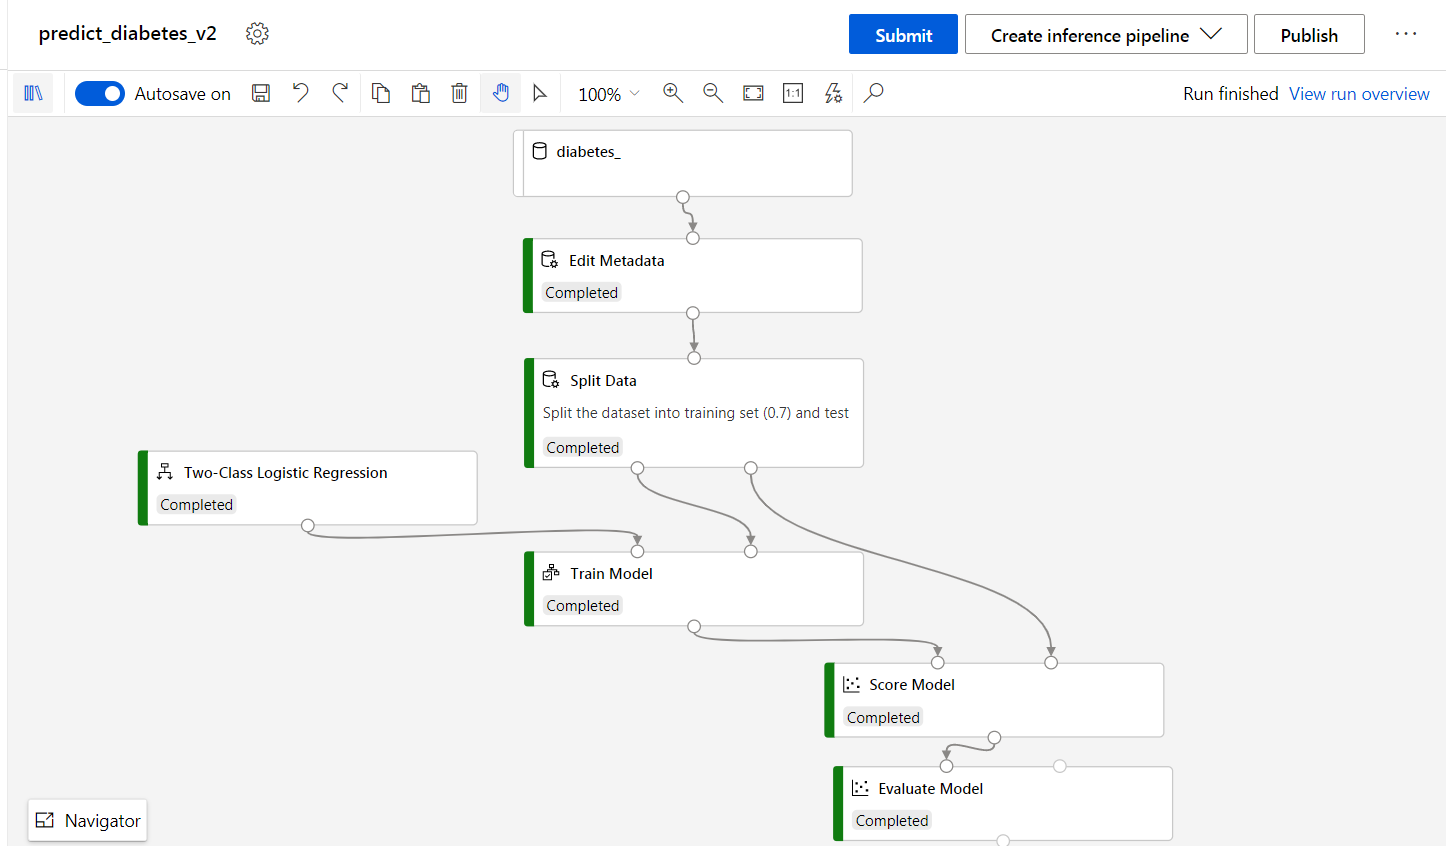

# VI. Deploy & Testing

Create real-time inference based on "Two-class Logistic Regression" model:

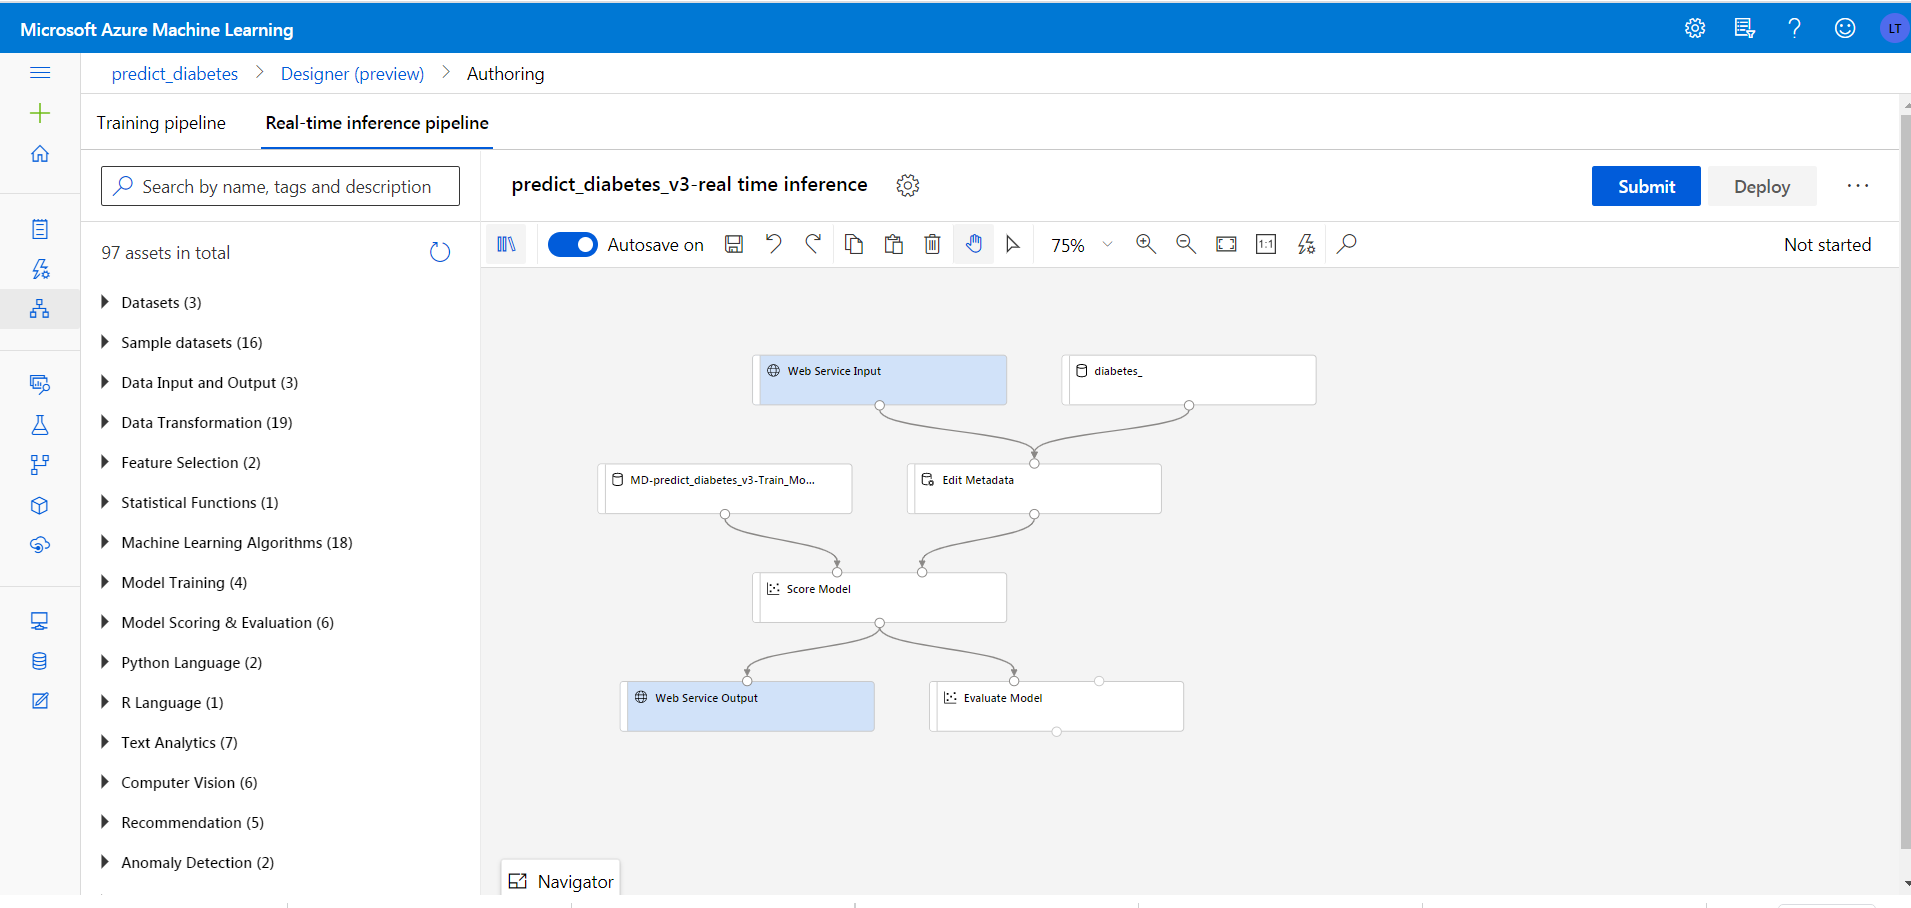

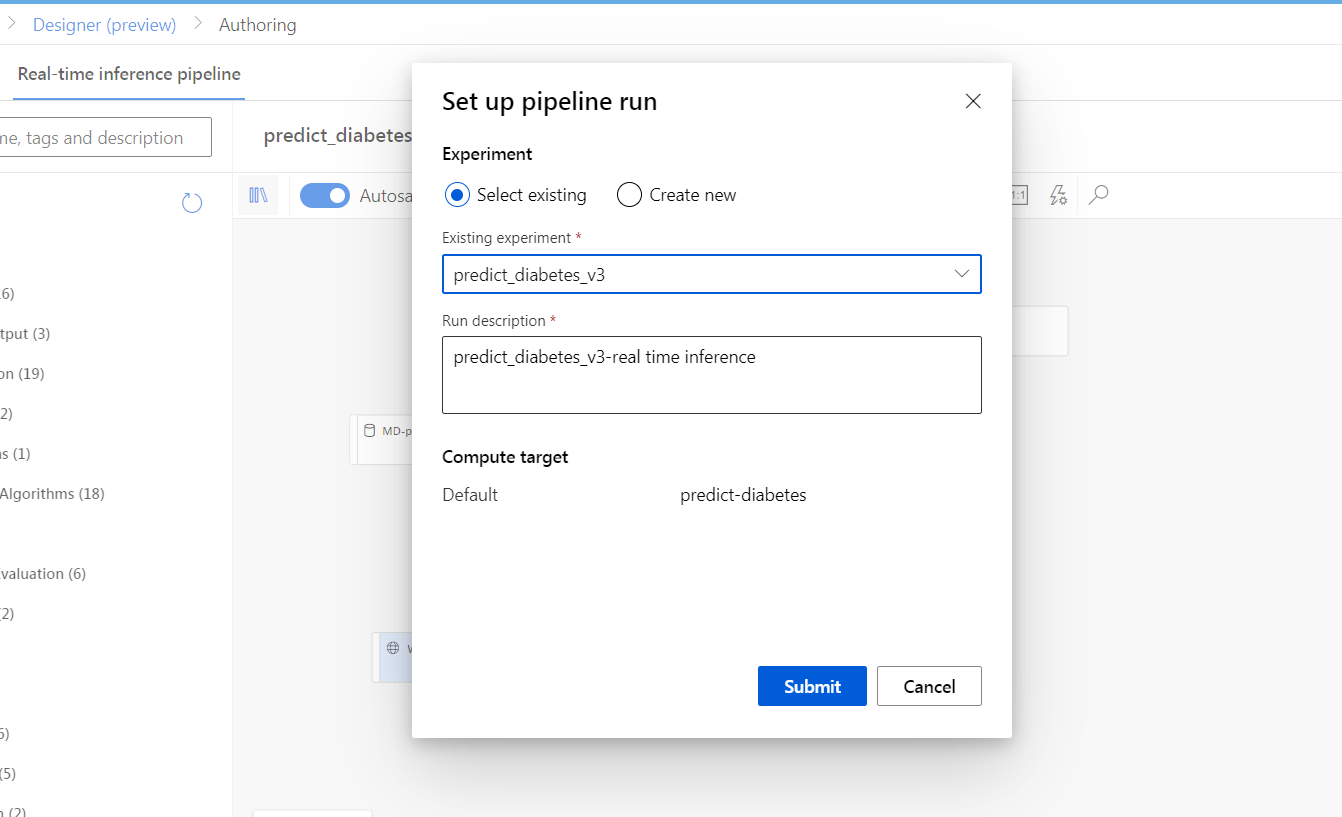

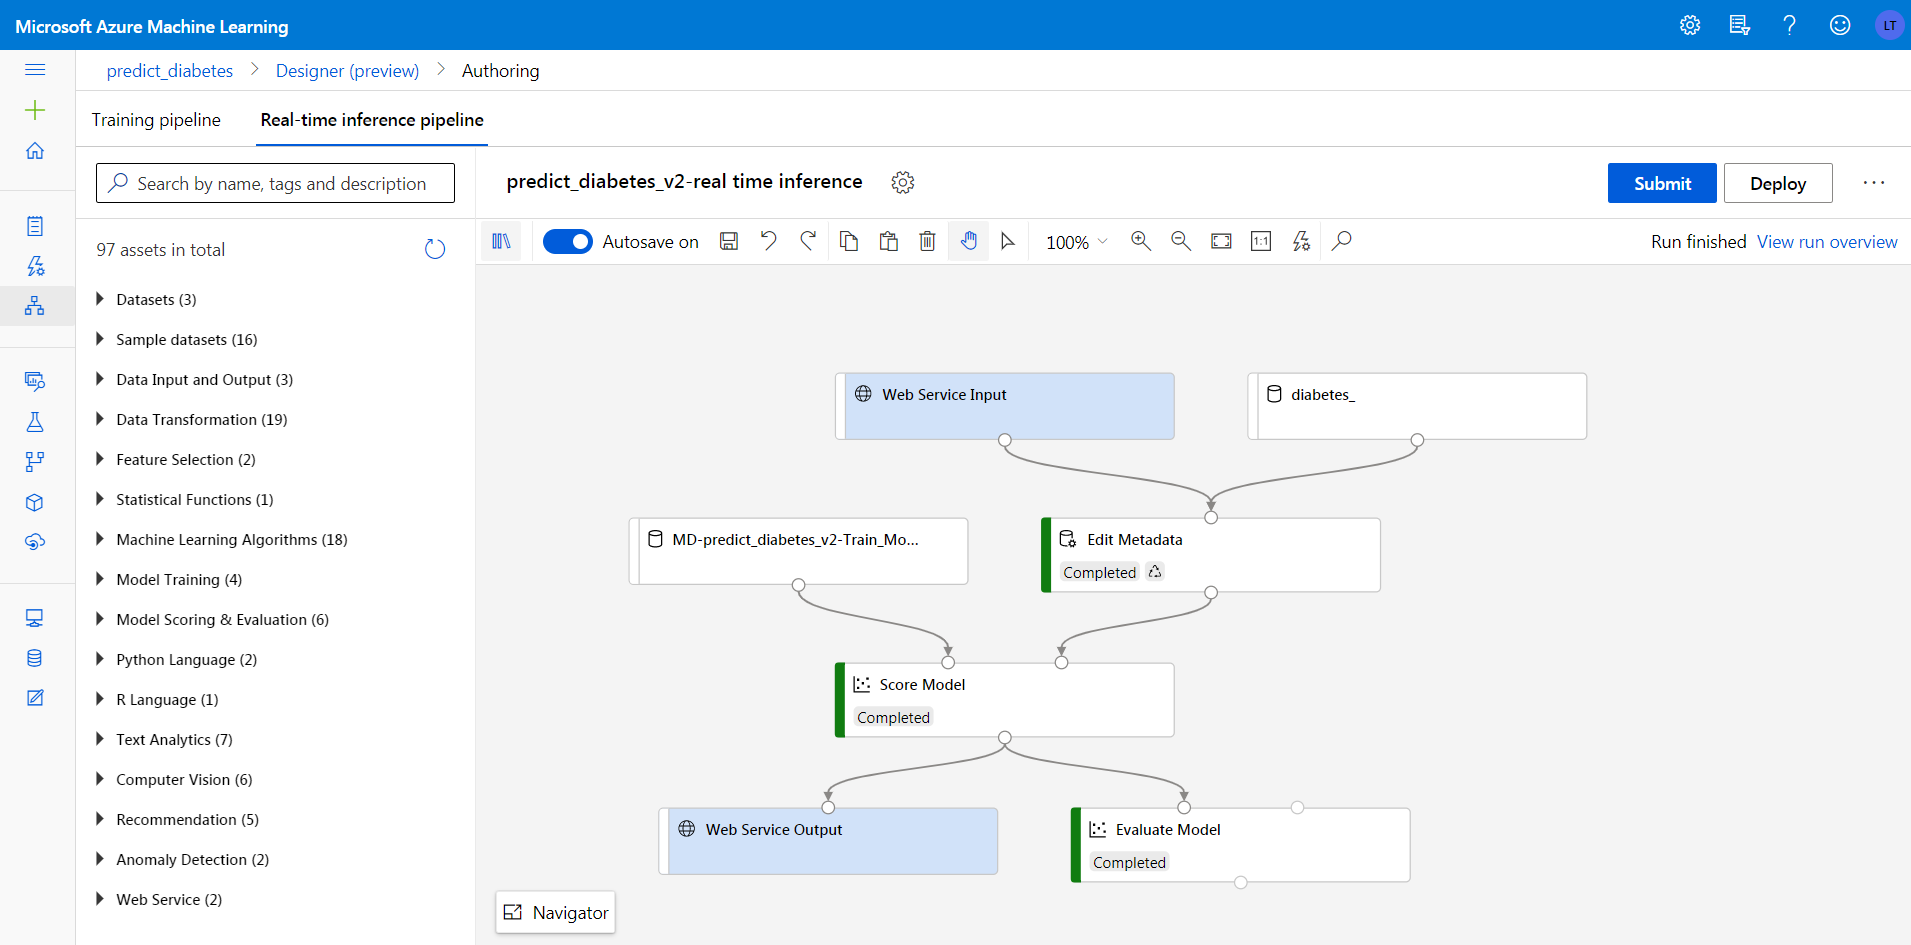

Before deploy, create an inference cluster:

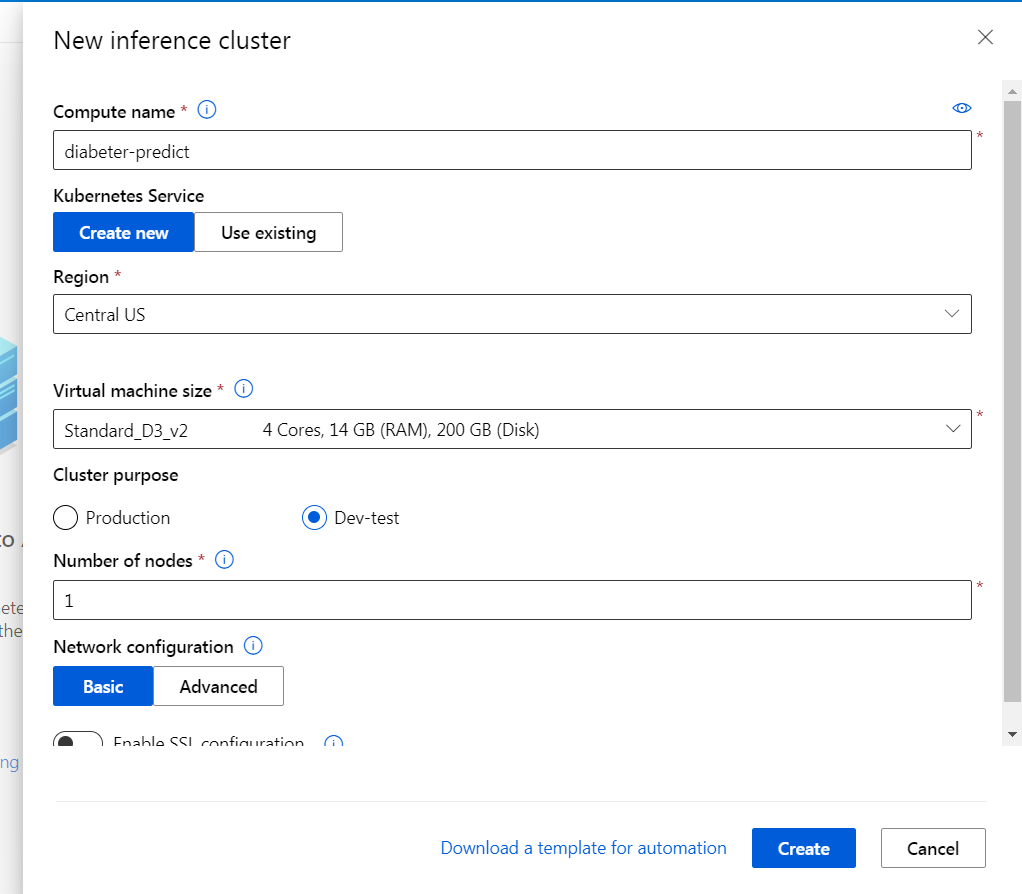

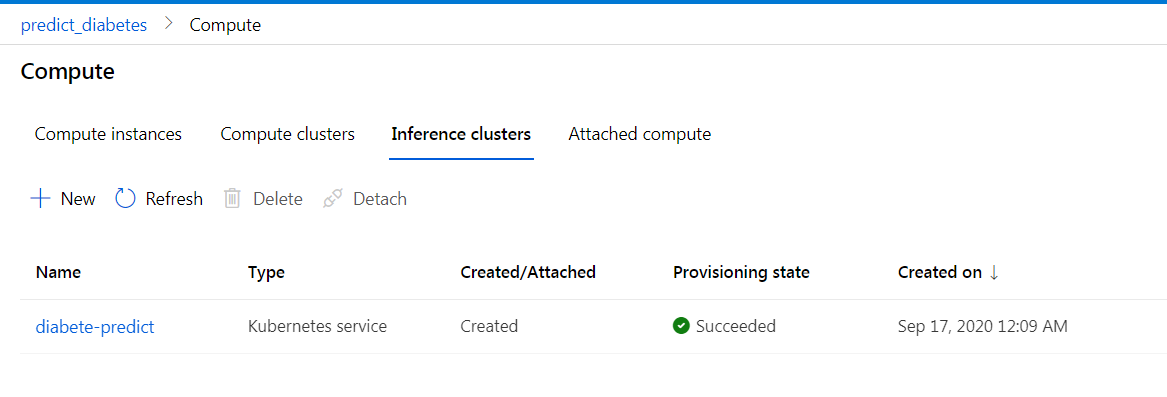

Set up real-time endpoint and deploy: 

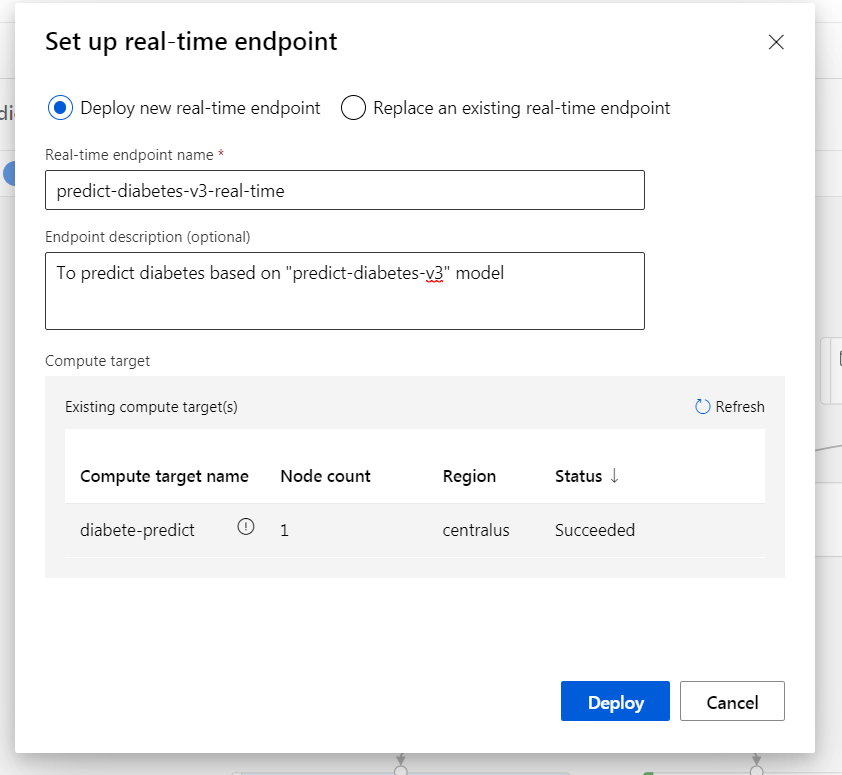

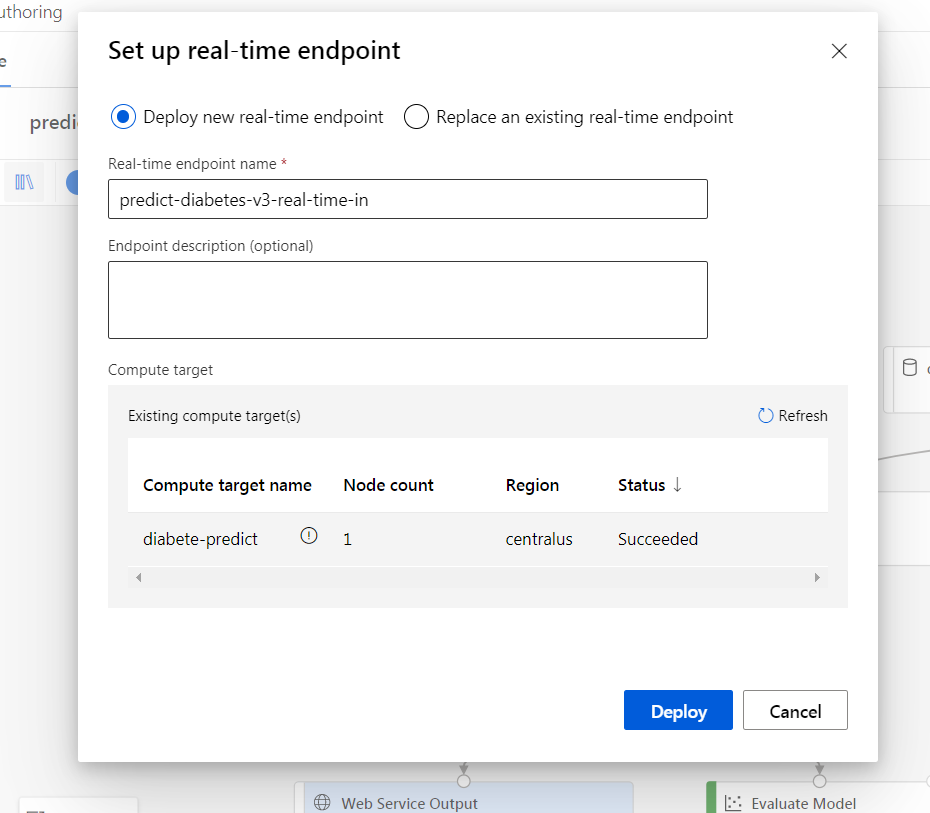

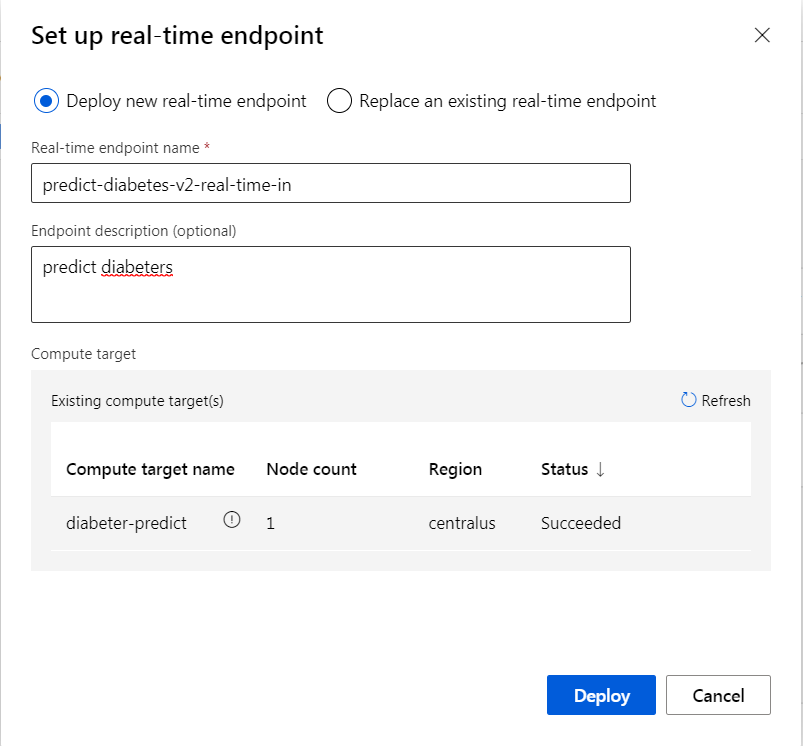

Test diabeters using this real-time endpoint 

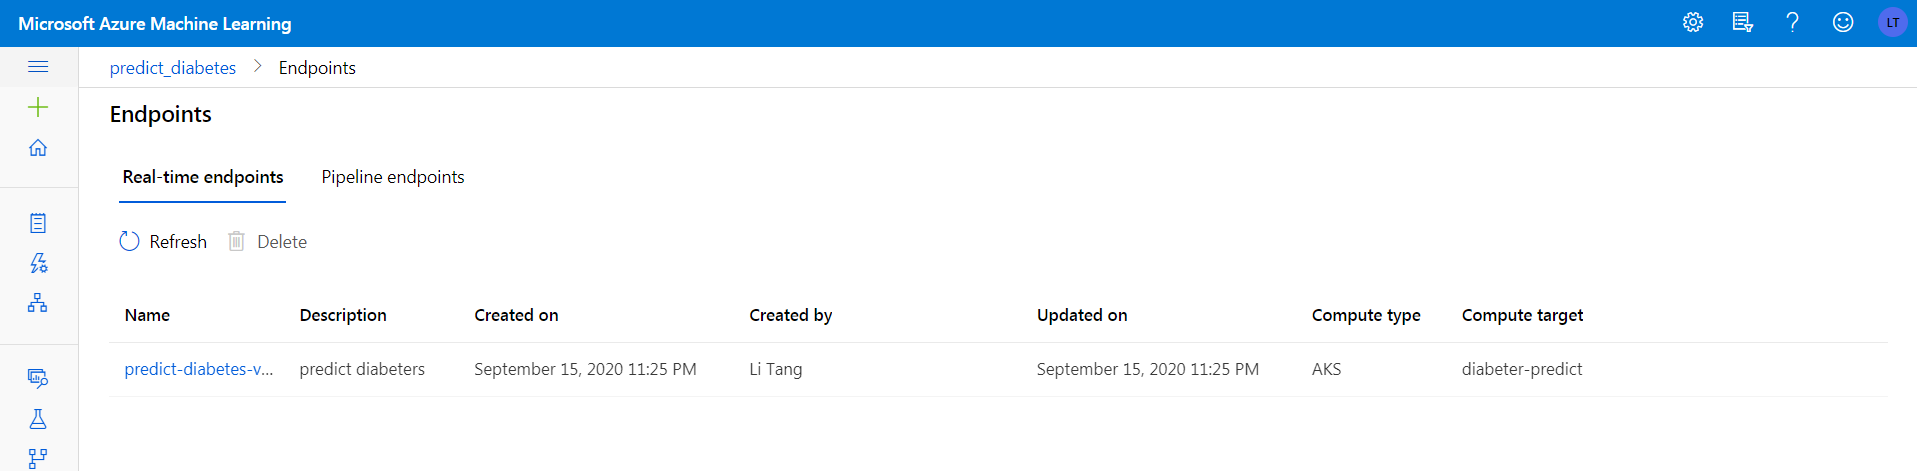

For prediction based on "Two-class Logistic Regression" model, an example with the Python script: 

In [18]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

data = {
    "Inputs": {
          "WebServiceInput0":
          [
              {
                    'Pregnancies': "2",
                    'Glucose': "88",
                    'BloodPressure': "58",
                    'SkinThickness': "26",
                    'Insulin': "16",
                    'BMI': "28.4",
                    'DiabetesPedigreeFunction': "0.766",
                    'Age': "22",
                    'Outcome': "0",
              },
          ],
    },
    "GlobalParameters":  {
    }
}

body = str.encode(json.dumps(data))

url = 'http://104.43.220.21:80/api/v1/service/diabetes-predict-v1-no-smot-real/score'
api_key = 'LDIlDu7Aq9Lg8GrZ9ZKvz16WcivfAgDQ' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

b'{"Results": {"WebServiceOutput0": [{"Pregnancies": 2, "Glucose": 88, "BloodPressure": 58, "SkinThickness": 26, "Insulin": 16, "BMI": 28.4, "DiabetesPedigreeFunction": 0.766, "Age": 22, "Outcome": 0, "Scored Labels": 0, "Scored Probabilities": 0.031713075103307474}]}}'


The final testing result was summerized and shown as below. 

In [22]:
df_testing = pd.read_csv('diabetes - testing.csv')

In [23]:
df_testing.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted_without SMOT,Score
0,0,123,72,0,0,36.3,0.258,52,1,1,0.792447
1,1,106,76,0,0,37.5,0.197,26,0,0,0.044945
2,6,190,92,0,0,35.5,0.278,66,1,1,0.560838
3,2,88,58,26,16,28.4,0.766,22,0,0,0.031713


# VII. Conclusion

Based on prediction results, the "Two-class Logistic Regression" training model does a pretty good job to accurately predict diabete outcome based on provided diagnostic measurements provided in all 4 cases. Our model trained with the use of Azure Machine Learning could serve as a useful tool for early screening for diabetes of females at least 21 years old, particular with Pima Indian heritage.